<div style="text-align: right">INFO 6105 Data Sci Engineering Methods and Tools, Week 7 Lecture 2</div>
<div style="text-align: right">Dino Konstantopoulos, 28 October 2021, with material by Chris Fonnesbeck and Cyrille Rossant</div>
<div style="text-align: right"><i>please browse all URLs in this notebook</i></div>

Last week, we learned **probability theory**. Basically, *if you can count* by building your random-variable sets and the predicates you want to apply on the datasets with python, you do not need to know the math behind probability theory (but knowing some of the math is helpful). 

We also did a quick intro to **Bayes' formula**, which allows you to invert the precondition and the postcondition on a conditional probability to make probabilities easier to evaluate. That is very useful for data science interviews that involve probability questions. We looked at an example counting M&Ms.

But Bayes' formula will open up a new universe of statistics for us, which we'll get into. For now, let's embark on an odyssey to learn *classical statistics*. What was invented in the 1800s. All in one notebook!

<div id="divCheckbox" style="display: none;">
"20102020"[::-1]
</div>

# The Method Of Moments (MOM) 

We'll illustrate the **Method of Moments** (MOM) with ***an example***. When you take a ***bad*** class in statistics, where you don't understand or tend to fall asleep at the helm, it's the ***fault of the professor!***

<br />
<center>
<img src =ipynb.images/asleep.jpg width = 400 />
</center>

A good professor will give you ***interesting problems*** to keep you awake. Then you’ll have an appreciation for how statistics helps us to understand the world. There are many **amazing phenomena** in the world, and we use data science as a tool for exploring them.

## The goal of non-machine-assisted data science

>**Goal**: Match the histogram of the data to a known pdf (figure out the parameters of that pdf if the pdf is parametric), and then use that pdf to generate data and do prdictions, rather than using the original dataset, because it's a lot easier than interpolation.

So, what Neanderthal data scientists did is to try to match the histogram of datasets to well-known theoretical profiles, and then they can use the theoretical profile (gaussian, gamma, etc.) to simulate data! 

Pretty clever, huh?

Now, with computers, ***we can do the same thing***, i.e. find the best approximation to our empirical histogram and then use libraries like `SciPy` to build simulations of (the process underlying) our data. So we don't need the math, as much as the Neanderthals did. Also, we can do additional things with computers using bayesian statistics, which we'll look into next week.

> **IMPORTANT**: Why do we want to produce data that may *look* different and yet follows the same histogram? Because we theorize that by capturing the histogram, we are modelling the *process* that produced the data, which is *what we're really after*. Plus real-world data has noise, and we don't like noise! That is what **data science** is all about.

To understand Neanderthal data scientists better, let's do some labs and try to leverage the parametrized distributions we just learned as potential models to datasets we observe. 

## Lab \#1: Nashville Precipitation

The dataset `nashville_precip.txt` contains NOAA precipitation data for the city of Nashville, Tennessee, measured since 1871. It is a classical dataset, like the iris dataset. Download it from canvas and put it in the right folder (you know..). The gamma distribution is a good fit to aggregated rainfall data, and will be our candidate distribution in this case. We'll use the gamma distribution model for Nashville precipitation to demonstrate MOM.

Let's peek at the data:

In [1]:
import pandas as pd

In [14]:
heart_df = pd.read_csv(r"D:\DSMT Assignments\Assignment7_DivyanshuBhardwaj\heart.csv")

In [20]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In the year 1871, in the month of January, Nashville saw 2.76 inches of rainfall.

### 1. Data Exploration: The Histogram

Let's do some data exploration with the ***histogram*** of precipitations, month by month. The histogram of a specific mootn tells us what's the most frequent number of inches of rain from 1871 onward.

</br >
<center>
<img src="ipynb.images/rainfall.jpeg" width=400 />
</center>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

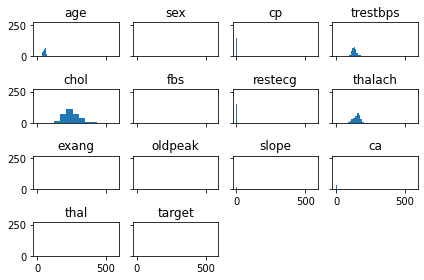

In [16]:
_ = heart_df.hist(sharex=True, sharey=True, grid=False)
plt.tight_layout()

The first step is recognizing what sort of distribution to fit our data to. A couple of observations:

1. The data is *skewed*, with a longer tail to the right than to the left
2. The data is positive-valued, since they are measuring rainfall
3. The data is continuous

Even just by ***eyeballing*** the theoretical pdfs we introduced (normal, Poisson, etc.) , ***even if you did not know what the Gamma distribution is usually used for***, a good option appears to be the **gamma distribution**: The curves look like ***Gaussians with long tails***. That's a Gamma!

<br />
<div style="font-size: 120%;">  
$$x \sim \text{Gamma}(\alpha, \beta) = \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)}$$
</div>

### 2. Data Cleansing 

***Wait***, there's something ***wrong*** with our data.. if you open it in a text editor, you will find a value of **NA** for October of 1963 (take a look). 

So we have to do some **data cleansing** first. That step is called **exploratory data cleansing** (EDA). *Always* do that, first.

Given what we are trying to do, it is ***sensible*** to fill in the missing value with the average of the available values (another option would have been the average of the months of September and November 1963). Filling in with 0 would be a *bad idea*.

In [6]:
precip.fillna(value={'Oct': precip.Oct.mean()}, inplace=True)
precip

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1871,2.76,4.58,5.01,4.13,3.30,2.98,1.58,2.36,0.95,1.31,2.13,1.65
1872,2.32,2.11,3.14,5.91,3.09,5.17,6.10,1.65,4.50,1.58,2.25,2.38
1873,2.96,7.14,4.11,3.59,6.31,4.20,4.63,2.36,1.81,4.28,4.36,5.94
1874,5.22,9.23,5.36,11.84,1.49,2.87,2.65,3.52,3.12,2.63,6.12,4.19
1875,6.15,3.06,8.14,4.22,1.73,5.63,8.12,1.60,3.79,1.25,5.46,4.30
...,...,...,...,...,...,...,...,...,...,...,...,...
2007,3.32,1.84,2.26,2.75,3.30,2.37,1.47,1.38,1.99,4.95,6.20,3.83
2008,4.76,2.53,5.56,7.20,5.54,2.21,4.32,1.67,0.88,5.03,1.75,6.72
2009,4.59,2.85,2.92,4.13,8.45,4.53,6.03,2.14,11.08,6.49,0.67,3.99


### 3. Method of Moments

The **method of moments** simply assigns the **empirical** (coming from the data) **mean** and **variance** to their **theoretical counterparts** (coming from the *model*, in this case the Gamma!), so that we can ***solve for the parameters*** of the Gamma!

So, for the gamma distribution, the mean and variance turn out to be (analytically derived):

<br />
<div style="font-size: 120%;">  
$$ \hat{\mu} = \bar{X} = \alpha \beta $$
$$ \hat{\sigma}^2 = S^2 = \alpha \beta^2 $$
</div>

So, if we solve for these parameters, we can use a gamma distribution to describe our data, with parameters:

<br />
<div style="font-size: 120%;">  
$$ \alpha = \frac{\bar{X}^2}{S^2}, \, \beta = \frac{S^2}{\bar{X}} $$
</div>

($\bar{X}$ is the mean, while $S^2$ is the variance of each column of the dataset).

Now, let's calculate the sample ***moments of interest***: the **means** and **variances** *month by month*, using good ol' `pandas`:

In [29]:
precip_mean = heart_df.mean()
precip_mean_chol = precip_mean['chol']
precip_mean_chol

246.26402640264027

In [26]:
precip_var = heart_df.var()
precip_var_chol = precip_var['chol']

In [27]:
precip_std_chol = precip_var_chol**(1/2)
precip_std_chol

51.83075098793004

We then use these moments to estimate $\alpha$ and $\beta$ for each month:
```python
alpha_mom = ...
beta_mom = ...
alpha_mom, beta_mom
```

<div style="display:none;">
alpha_mom = precip_mean ** 2 / precip_var
beta_mom = precip_var / precip_mean
</div>

In [10]:
alpha_mom = precip_mean ** 2 / precip_var 
beta_mom = precip_var / precip_mean

Then, use the `gamma.pdf` function in `scipy.stats.distributions` to plot the distributions implied by the calculated alphas and betas. 

For example, here is `January` (and note that scipy's gamma is the *gamma distribution*, not the $\Gamma$ function that interpolates $n!$ to real numbers, even though the $\Gamma$ function figures in the denominator of the gamma distribution):

<AxesSubplot:>

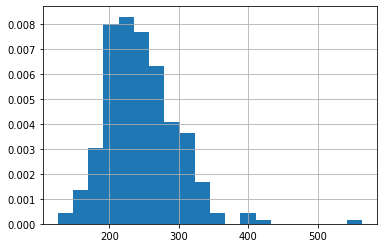

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats.distributions import gamma, norm
min = precip_std_chol.min()
max = precip_std_chol.max()
heart_df.chol.hist(density=True, bins=20)
plt.plot(np.arange(min, ), norm.pdf(np.linspace(0, 10),precip_mean_chol,precip_std_chol))

Not bad for january :-) Looping over all months now, create a grid of plots for the distribution of rainfall, using the gamma distribution. Here is how you can create a grid of plots:

```python
axs = precip.hist(normed=True, figsize=(12, 8), sharex=True, sharey=True, bins=15, grid=True)

for ax in axs.ravel():
    
    # Get month
    m = ax.get_title()
    
    # Plot fitted distribution
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, gamma.pdf(x, alpha_mom[m], beta_mom[m]))
    
    # Annotate with parameter estimates
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[m], beta_mom[m])
    ax.annotate(label, xy=(10, 0.2))
    
plt.tight_layout()
```

<div style="display:none;">
axs = precip.hist(normed=True, figsize=(12, 8), sharex=True, sharey=True, bins=15, grid=True)

for ax in axs.ravel():
    
    # Get month
    m = ax.get_title()
    
    # Plot fitted distribution
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, gamma.pdf(x, alpha_mom[m], beta_mom[m]))
    
    # Annotate with parameter estimates
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[m], beta_mom[m])
    ax.annotate(label, xy=(10, 0.2))
    
plt.tight_layout()
</div>

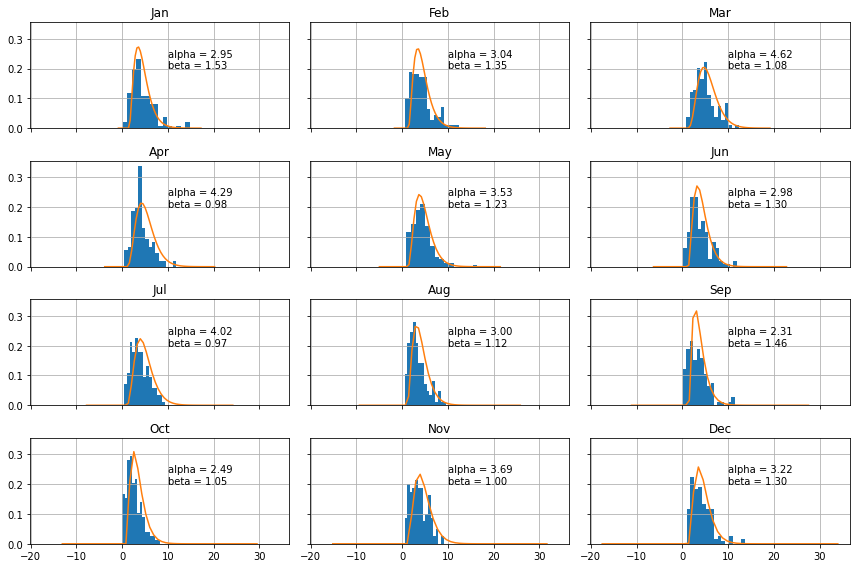

In [14]:
axs = precip.hist(density=True, figsize=(12, 8), sharex=True, sharey=True, bins=15, grid=True)

for ax in axs.ravel():

    # Get month
    m = ax.get_title()

    # Plot fitted distribution
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, gamma.pdf(x, alpha_mom[m], beta_mom[m]))

    # Annotate with parameter estimates
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[m], beta_mom[m])
    ax.annotate(label, xy=(10, 0.2))

plt.tight_layout()






Good job, that was **data science**! You built a model from precipitation data, and now when somebody asks you to about weather for a certain month, you can give a good (historical) prediction.
<left>
<img src="ipynb.images/good-job-bear.png" width=200 />
</left>

### 4. Conclusion

In math, a **moment** is a specific quantitative measure of the ***shape of a set of points***. 

The *zeroth* moment is the total mass, the *first* moment is the center of mass, the *second* moment is rotational inertia. Oops.. this is not mechanics 101, it's statistics 101...

So, the *zeroth* moment is total probability, *first* moment is the [mean](https://en.wikipedia.org/wiki/Mean), *second* moment is the [variance](https://en.wikipedia.org/wiki/Variance), *third* moment is the [skewness](https://en.wikipedia.org/wiki/Skewness), *fourth* moment is the [kurtosis](https://en.wikipedia.org/wiki/Kurtosis). And you can keep on going...

For a distribution of mass or probability on a bounded interval, the collection of all the moments (of all orders, from 0 to $\infty$) ***uniquely determines the distribution***. This is related to [Taylor's approximation theorem](https://en.wikipedia.org/wiki/Taylor%27s_theorem).

Minimum number of moments we need in the **Method of Moments** equal the ***number of the parameters in the estimator***! For each moment, we equate the moment of the ***model + parameters*** to the moment of the dataset. That gives us ***one*** equation for the parameters. We will need as many equations (thus moments) as there are parameters!

The method of Moments is ***easy-peasy***, as long as we have analytic formulas for the moments for the model distribution (which we usually do, *that is why* they are **models**). 

But they're usually *not* the most efficient estimators.

Next, we look at Maximum Likelihood Estimation (MLE), which is a little bit harder to understand because we need to learn some more math...
>**Note**: That math will be extremely useful for us though, because it's the basis of Machine Learning.

# Homework

Finish the homework in this notebook.

Find a simple **one-humped** dataset and model it by matching one of the pdfs we learned about today. Find the most likely parameters of your pdf using MOM. Use the model to do a prediction.

***You will work in teams of 2***. Your TAs will assign you in working teams.

Please find an ***original dataset***. Don't use a boring dataset that everyone can easily google for :-)